In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
data_train=pd.read_csv('train_ctrUa4K.csv')

In [4]:
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
data_train.shape

(614, 13)

In [7]:
data_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
data_test=pd.read_csv('test_lAUu6dG.csv')

In [13]:
data_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [14]:
data_test.shape

(367, 12)

In [15]:
data_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [16]:
data_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [17]:
data_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot: title={'center': 'Loan Status Bar Plot'}, xlabel='Loan Status', ylabel='Loan Status Count'>

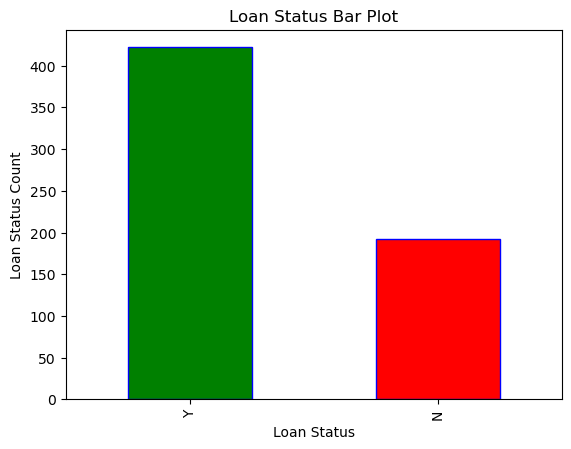

In [23]:
plt.title('Loan Status Bar Plot')
plt.xlabel('Loan Status')
plt.ylabel('Loan Status Count')

data_train['Loan_Status'].value_counts().plot.bar(color=['green', 'red'],edgecolor='blue')

In [24]:
data_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [42]:
from sklearn.preprocessing import LabelEncoder

In [27]:
data_train['Gender'].fillna(data_train['Gender'].mode()[0],inplace=True)
data_train['Married'].fillna(data_train['Married'].mode()[0],inplace=True)
data_train['Dependents'].fillna(data_train['Dependents'].mode()[0],inplace=True)
data_train['Self_Employed'].fillna(data_train['Self_Employed'].mode()[0],inplace=True)
data_train['Credit_History'].fillna(data_train['Credit_History'].mode()[0],inplace=True)

#----------- For Test Data
data_test['Gender'].fillna(data_train['Gender'].mode()[0], inplace=True)
data_test['Dependents'].fillna(data_train['Dependents'].mode()[0], inplace=True)
data_test['Self_Employed'].fillna(data_train['Self_Employed'].mode()[0], inplace=True)
data_test['Credit_History'].fillna(data_train['Credit_History'].mode()[0], inplace=True)
data_test['Loan_Amount_Term'].fillna(data_train['Loan_Amount_Term'].mode()[0], inplace=True)
data_test['LoanAmount'].fillna(data_train['LoanAmount'].median(), inplace=True)

In [29]:
data_train['Loan_Amount_Term'].fillna(data_train['Loan_Amount_Term'].mode()[0], inplace=True)

In [30]:
data_train['LoanAmount'].fillna(data_train['LoanAmount'].median(),inplace=True) 

In [31]:
data_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [32]:
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data_train = data_train.drop('Loan_ID',axis=1)
data_test = data_test.drop('Loan_ID',axis=1)

In [83]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(5), int32(3), int64(4)
memory usage: 50.5 KB


In [35]:
data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [36]:
data_train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [38]:
num_data=data_train.select_dtypes(include=['int64', 'float64'])
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [40]:
cat_data=data_train.select_dtypes(include=['object'])
cat_data

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [41]:
org_data=data_train.copy()
org_data1=data_test.copy()

In [44]:
le=LabelEncoder()

data_train['Gender']=le.fit_transform(data_train['Gender'])
data_train['Married']=le.fit_transform(data_train['Married'])
data_train['Dependents']=le.fit_transform(data_train['Dependents'])
data_train['Education']=le.fit_transform(data_train['Education'])
data_train['Self_Employed']=le.fit_transform(data_train['Self_Employed'])
data_train['Property_Area']=le.fit_transform(data_train['Property_Area'])
data_train['Loan_Status']=le.fit_transform(data_train['Loan_Status'])

In [94]:
data_test['Gender']=le.fit_transform(data_test['Gender'])
data_test['Married']=le.fit_transform(data_test['Married'])
data_test['Dependents']=le.fit_transform(data_test['Dependents'])
data_test['Education']=le.fit_transform(data_test['Education'])
data_test['Self_Employed']=le.fit_transform(data_test['Self_Employed'])
data_test['Property_Area']=le.fit_transform(data_test['Property_Area'])

In [45]:
data_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


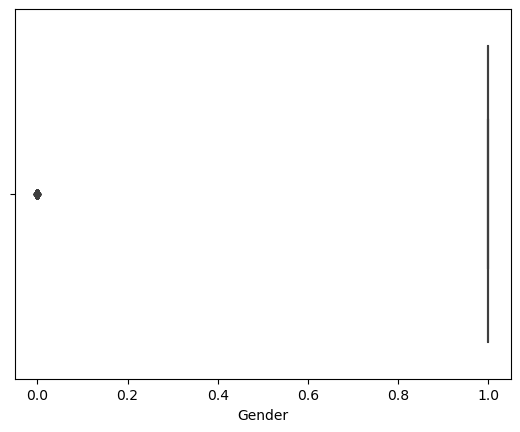

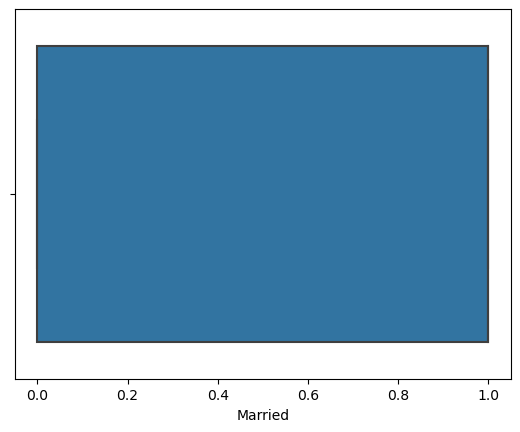

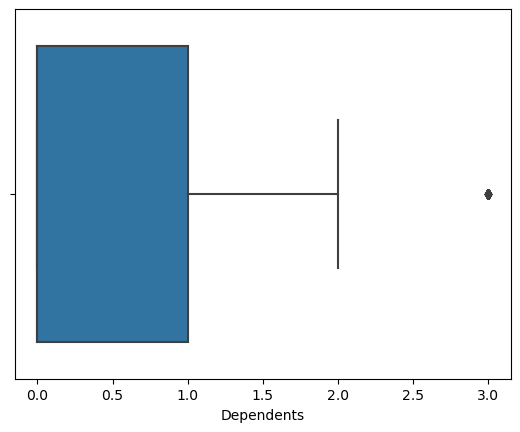

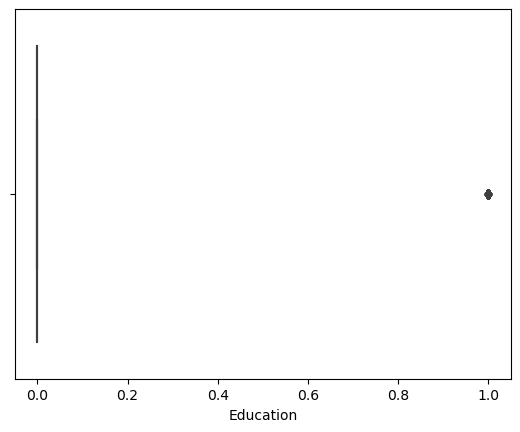

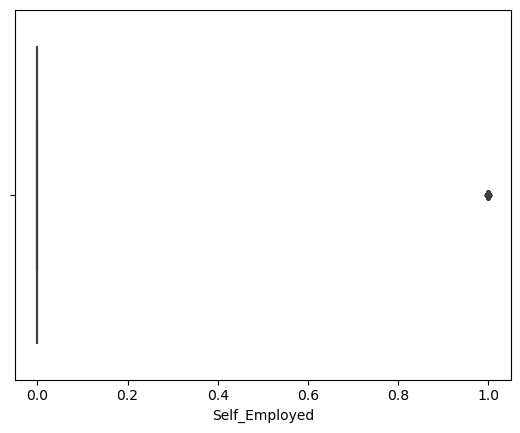

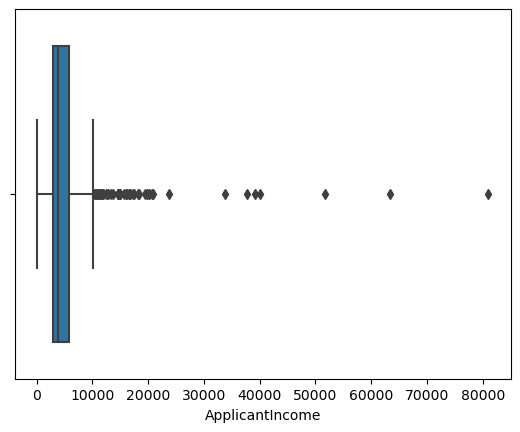

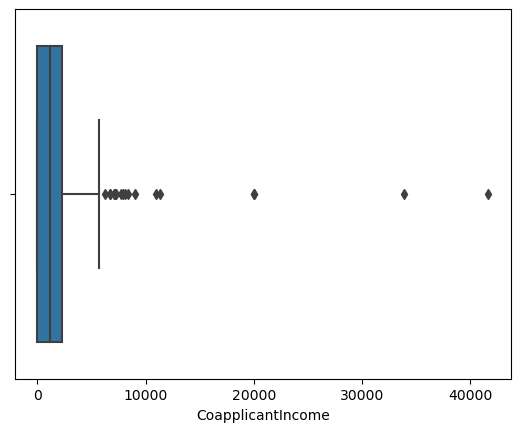

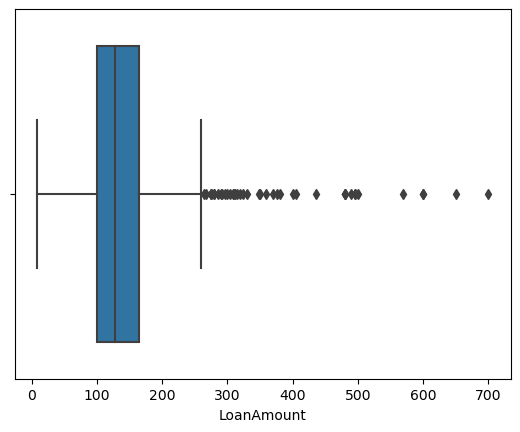

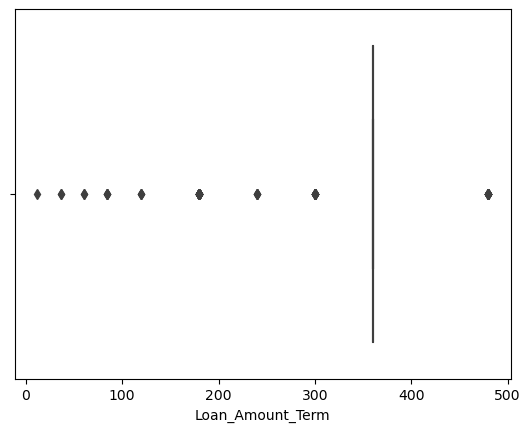

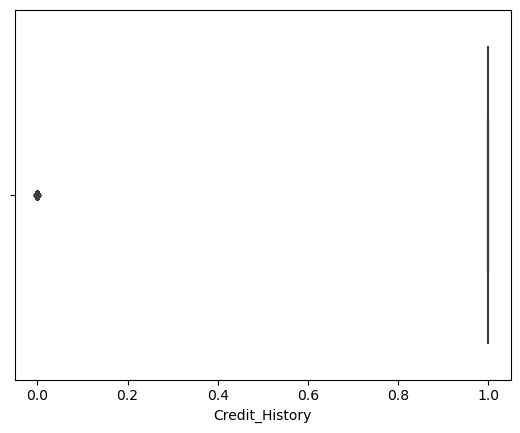

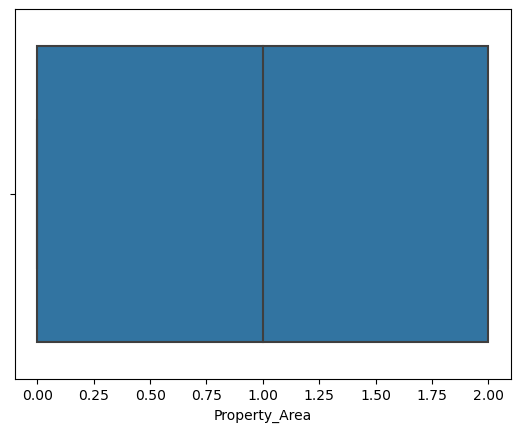

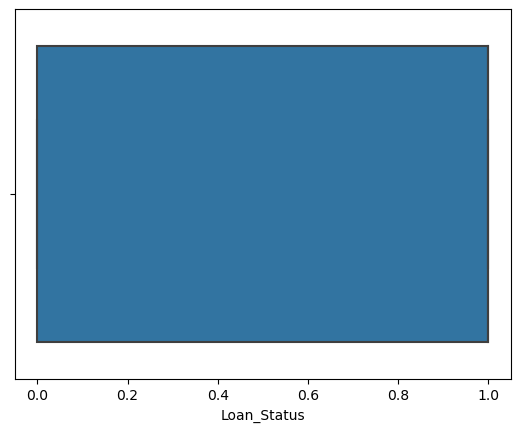

In [46]:
for i in data_train:
    sns.boxplot(x=data_train[i])
    plt.show()

In [50]:
IQR=stats.iqr(data_train.ApplicantIncome,interpolation='midpoint')
Q1=data_train.ApplicantIncome.quantile(0.25)
Q3=data_train.ApplicantIncome.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-1489.0, 10161.5)

In [52]:
data_train.loc[data_train.ApplicantIncome>max_limit]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0
34,1,0,3,0,0,12500,3000.0,320.0,360.0,1.0,0,0
54,0,1,1,0,1,11500,0.0,286.0,360.0,0.0,2,0
67,1,1,1,0,0,10750,0.0,312.0,360.0,1.0,2,1
102,1,1,0,0,0,13650,0.0,128.0,360.0,1.0,2,1
106,1,1,2,0,0,11417,1126.0,225.0,360.0,1.0,2,1
115,1,1,1,0,0,14583,0.0,185.0,180.0,1.0,0,1
119,0,0,0,0,0,10408,0.0,259.0,360.0,1.0,2,1
126,1,1,3,0,0,23803,0.0,370.0,360.0,1.0,0,1
128,1,1,1,0,1,10513,3850.0,160.0,180.0,0.0,2,0


In [55]:
data_train.loc[data_train.ApplicantIncome<min_limit]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [58]:
data_train.loc[data_train['ApplicantIncome']>max_limit,'ApplicantIncome']=np.median(data_train.ApplicantIncome)

In [59]:
data_train.loc[data_train.ApplicantIncome>max_limit]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [60]:
IQR=stats.iqr(data_train.CoapplicantIncome,interpolation='midpoint')
Q1=data_train.CoapplicantIncome.quantile(0.25)
Q3=data_train.CoapplicantIncome.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(-3438.75, 5736.0)

In [61]:
data_train.loc[data_train.CoapplicantIncome>max_limit]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,1,1,1,0,0,3812.5,10968.0,349.0,360.0,1.0,1,0
12,1,1,2,0,0,3073.0,8106.0,200.0,360.0,1.0,2,1
38,1,0,0,0,0,4166.0,7210.0,184.0,360.0,1.0,2,1
122,0,0,0,0,0,2137.0,8980.0,137.0,360.0,0.0,1,1
135,1,1,3,0,0,4000.0,7750.0,290.0,360.0,1.0,1,0
177,1,1,3,0,0,5516.0,11300.0,495.0,360.0,0.0,1,0
180,1,1,1,0,0,6400.0,7250.0,180.0,360.0,0.0,2,0
253,1,1,1,1,0,2661.0,7101.0,279.0,180.0,1.0,1,1
349,1,1,0,0,0,2625.0,6250.0,187.0,360.0,1.0,0,1
372,1,1,2,0,1,9323.0,7873.0,380.0,300.0,1.0,0,1


In [63]:
data_train.loc[data_train.CoapplicantIncome<min_limit]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [64]:
data_train.loc[data_train['CoapplicantIncome']>max_limit,'CoapplicantIncome']=np.median(data_train.CoapplicantIncome)

In [65]:
data_train.loc[data_train.CoapplicantIncome>max_limit]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [66]:
IQR=stats.iqr(data_train.LoanAmount,interpolation='midpoint')
Q1=data_train.LoanAmount.quantile(0.25)
Q3=data_train.LoanAmount.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(4.25, 260.75)

In [67]:
data_train.loc[data_train.LoanAmount>max_limit]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
5,1,1,2,0,1,5417.0,4196.0,267.0,360.0,1.0,2,1
9,1,1,1,0,0,3812.5,1188.5,349.0,360.0,1.0,1,0
21,1,1,1,0,0,5955.0,5625.0,315.0,360.0,1.0,2,1
34,1,0,3,0,0,3812.5,3000.0,320.0,360.0,1.0,0,0
54,0,1,1,0,1,3812.5,0.0,286.0,360.0,0.0,2,0
67,1,1,1,0,0,3812.5,0.0,312.0,360.0,1.0,2,1
83,1,1,0,0,0,6000.0,2250.0,265.0,360.0,1.0,1,0
126,1,1,3,0,0,3812.5,0.0,370.0,360.0,1.0,0,1
130,1,0,0,0,1,3812.5,0.0,650.0,480.0,1.0,2,1
135,1,1,3,0,0,4000.0,1188.5,290.0,360.0,1.0,1,0


In [68]:
data_train.loc[data_train.LoanAmount<min_limit]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [69]:
data_train.loc[data_train['LoanAmount']>max_limit,'LoanAmount']=np.median(data_train.LoanAmount)

In [70]:
IQR=stats.iqr(data_train.Loan_Amount_Term,interpolation='midpoint')
Q1=data_train.Loan_Amount_Term.quantile(0.25)
Q3=data_train.Loan_Amount_Term.quantile(0.75)
min_limit=Q1-1.5*IQR
max_limit=Q3+1.5*IQR
min_limit,max_limit

(360.0, 360.0)

In [71]:
data_train.loc[data_train.Loan_Amount_Term>max_limit]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
75,1,0,0,0,0,3750.0,0.0,113.0,480.0,1.0,2,0
109,1,1,3,1,0,2071.0,754.0,94.0,480.0,1.0,1,1
130,1,0,0,0,1,3812.5,0.0,128.0,480.0,1.0,2,1
168,1,0,0,0,0,2237.0,0.0,63.0,480.0,0.0,1,0
179,1,0,0,1,0,2333.0,1451.0,102.0,480.0,0.0,2,0
228,1,1,0,0,0,4758.0,0.0,158.0,480.0,1.0,1,1
248,1,1,1,0,0,2882.0,1843.0,123.0,480.0,1.0,1,1
293,0,0,0,0,0,5417.0,0.0,143.0,480.0,0.0,2,0
298,0,0,0,0,0,5000.0,2541.0,151.0,480.0,1.0,0,0
358,1,1,0,1,0,3000.0,1666.0,100.0,480.0,0.0,2,0


In [72]:
data_train.loc[data_train.Loan_Amount_Term<min_limit]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
14,1,1,2,0,0,1299.0,1086.0,17.0,120.0,1.0,2,1
16,1,0,1,1,0,3596.0,0.0,100.0,240.0,1.0,2,1
62,1,1,0,1,1,2609.0,3449.0,165.0,180.0,0.0,0,0
66,1,0,0,1,0,3200.0,2254.0,126.0,180.0,0.0,2,0
68,1,1,3,1,1,7100.0,0.0,125.0,60.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
591,1,1,2,0,1,6000.0,0.0,205.0,240.0,1.0,1,0
593,1,1,0,0,0,3859.0,3300.0,142.0,180.0,1.0,0,1
600,0,0,3,0,0,416.0,1188.5,128.0,180.0,1.0,2,0
605,1,1,0,1,0,2400.0,3800.0,128.0,180.0,1.0,2,0


In [75]:
data_train.loc[data_train['Loan_Amount_Term']>max_limit,'Loan_Amount_Term']=np.median(data_train.Loan_Amount_Term)
data_train.loc[data_train['Loan_Amount_Term']<min_limit,'Loan_Amount_Term']=np.median(data_train.Loan_Amount_Term)

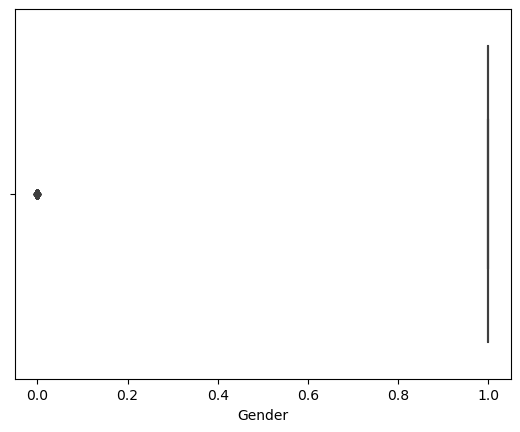

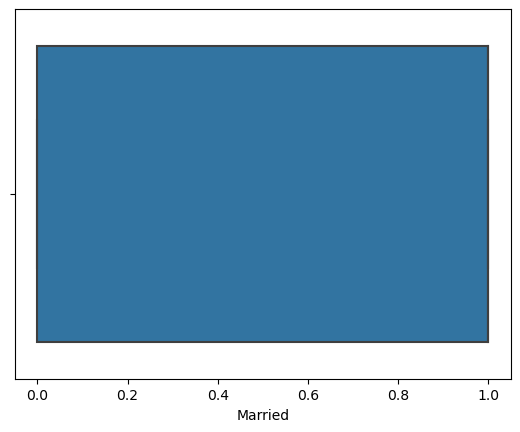

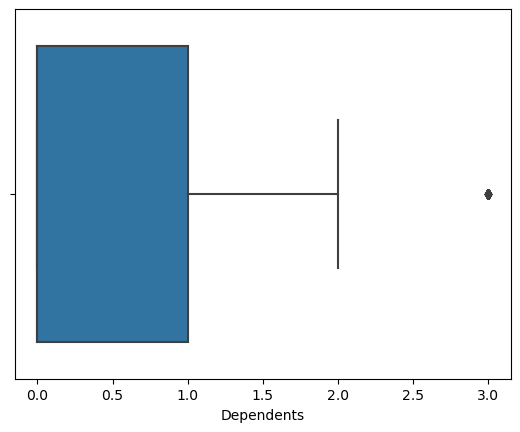

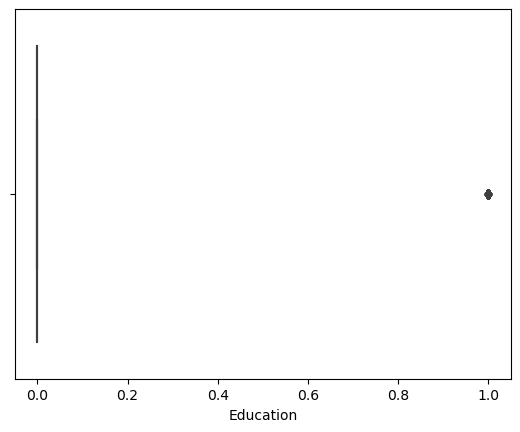

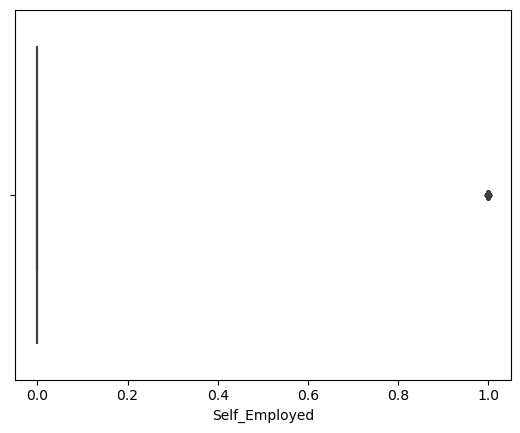

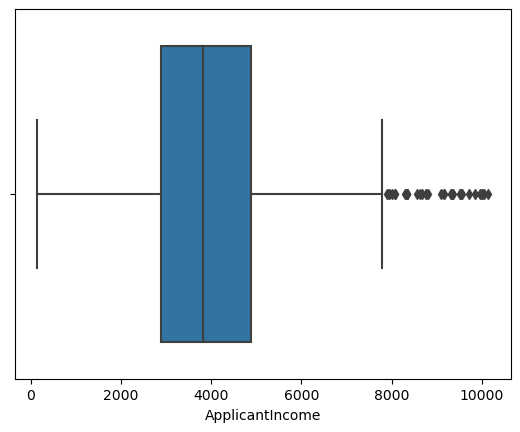

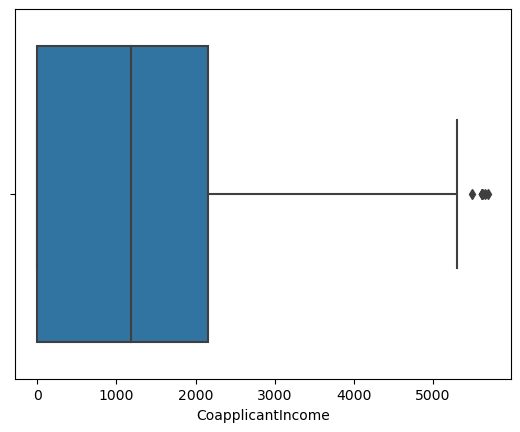

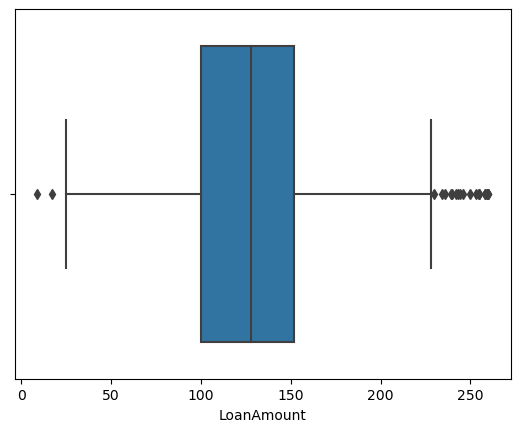

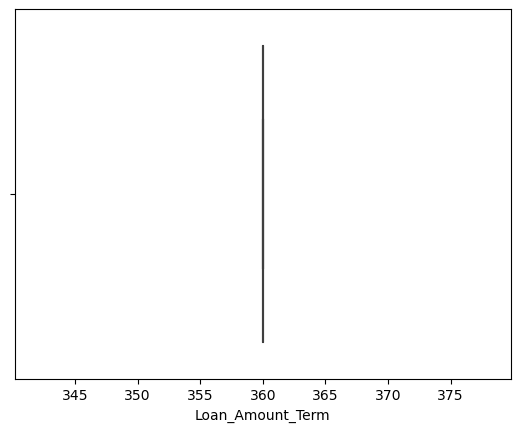

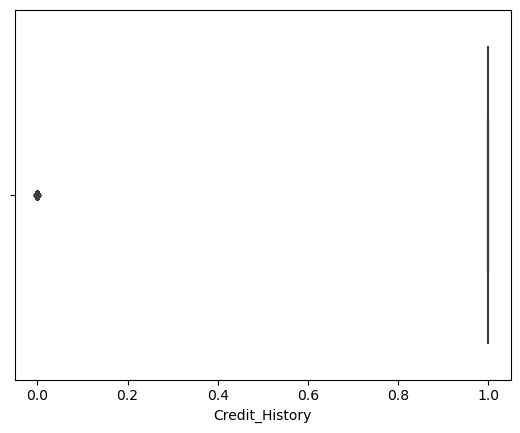

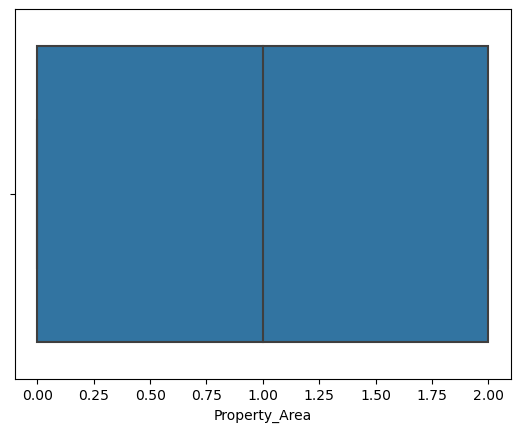

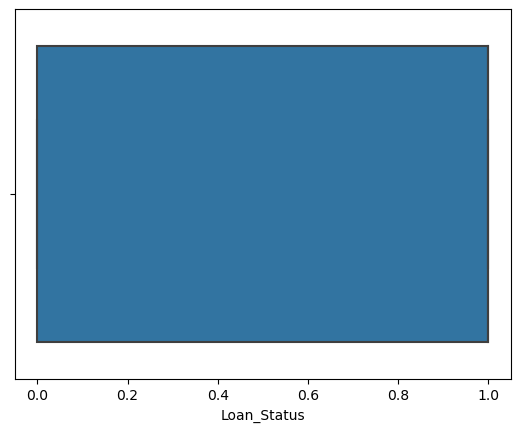

In [76]:
for i in data_train:
    sns.boxplot(x=data_train[i])
    plt.show()

In [80]:
data_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1


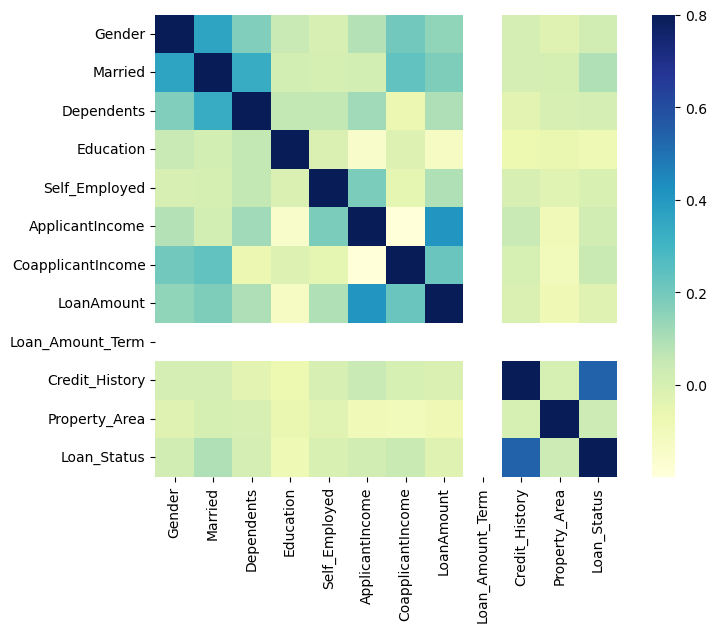

In [78]:
corrmatrix = data_train.corr() 
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corrmatrix, vmax=.8, square=True, cmap="YlGnBu");

In [85]:
x = data_train.drop('Loan_Status',axis=1)
y = data_train['Loan_Status']

In [86]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [87]:
x = pd.get_dummies(x)
data_train = pd.get_dummies(data_train)
daat_test = pd.get_dummies(data_test)

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3,random_state=42)

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [90]:
pred = model.predict(x_test)

accuracy_score(y_test,pred)

0.7837837837837838

In [96]:
pred_test = model.predict(data_test)

In [97]:
submission=pd.read_csv("sample_submission_49d68Cx.csv")

In [98]:
test_original = pd.read_csv("test_lAUu6dG.csv")
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']

In [99]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [100]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [102]:
from sklearn.model_selection import StratifiedKFold
i = 1
accuracy = []

skf = StratifiedKFold(n_splits=5, random_state=1, shuffle = True)
#skf.get_n_splits(x,y)

for train_index,test_index in skf.split(x,y):
    #print("train: ",train_index," Validation : ",test_index)
    print('\n{} of kfold {}'.format(i,skf.n_splits))
    x1_train,x1_val = x.iloc[train_index],x.iloc[test_index]
    y1_train,y1_val = y.iloc[train_index],y.iloc[test_index]
    model = LogisticRegression(max_iter=200 ,random_state=1)
    model.fit(x1_train,y1_train)
    prediction_test = model.predict(x1_val)
    score = accuracy_score(y1_val,prediction_test)
    print('accuracy_score',score)
    i+=1 
    pred_test = model.predict(data_test) 
    #print("pred_test",pred_test)
    pred=model.predict_proba(x1_val)[:,1]
    #print("pred",pred)


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8292682926829268

3 of kfold 5
accuracy_score 0.7967479674796748

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7950819672131147


In [103]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']

#Remember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
#Lets convert the submission to .csv format and make submission to check the accuracy on the leaderboard.

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistickfold.csv',index=False)

In [104]:
submission.head

<bound method NDFrame.head of       Loan_ID Loan_Status
0    LP001015           Y
1    LP001022           Y
2    LP001031           Y
3    LP001035           Y
4    LP001051           Y
..        ...         ...
362  LP002971           Y
363  LP002975           Y
364  LP002980           Y
365  LP002986           Y
366  LP002989           Y

[367 rows x 2 columns]>